# DE PROJECT NETW908
## Name - 
## ID - 
## Major - IET Networks

## Data extraction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime as dt
from datetime import timedelta as td
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, Normalizer

In [2]:
# Q2 2020: April 1st – June 30th
# MMM,AXP,AIG,ADB,ACN,CHRW,CSCO,DVN,XOM,GM
# symbol,open,close,high,low,volume,change percent,date,company name and sector

api_key = 'pk_886b24432ed044abb0bf23fcd5e2b313'

stocks = ['MMM','AXP','AIG','ADB','ACN','CHRW','CSCO','DVN','XOM','GM']
url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=chart&range=Q22020&token={api_key}'

In [3]:
batch = requests.get(url_batch).json()

In [4]:
#batch

In [5]:
dict_df = {'symbol':[],'close':[],'open':[],'high':[], 'low':[], 'volume':[], 'changePercent':[], 'date':[]} 
for symbol in batch.keys():
    for row in batch[symbol]['chart']:
        dict_df['symbol'].append(row['symbol'])
        dict_df['close'].append(row['close'])
        dict_df['open'].append(row['open'])
        dict_df['high'].append(row['high'])
        dict_df['low'].append(row['low'])
        dict_df['volume'].append(row['volume'])
        dict_df['changePercent'].append(row['changePercent'])
        dict_df['date'].append(row['date'])

In [6]:
df_batch = pd.DataFrame(dict_df)

In [7]:
df_batch.symbol.unique()

array(['MMM', 'AXP', 'AIG', 'ACN', 'CHRW', 'CSCO', 'DVN', 'XOM', 'GM'],
      dtype=object)

In [8]:
url_company = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=company&token={api_key}'
company_info = requests.get(url_company).json()

In [9]:
info = {'symbol':[], 'companyName':[],'sector':[]}
for symbol in company_info.keys():
    info['symbol'].append(company_info[symbol]['company']['symbol'])
    info['companyName'].append(company_info[symbol]['company']['companyName'])
    info['sector'].append(company_info[symbol]['company']['sector'])

In [10]:
comps = pd.DataFrame(info)
df = pd.merge(df_batch,comps,on='symbol')
df.companyName.unique()

array(['3M Co.', 'American Express Co.',
       'American International Group Inc', 'Accenture plc',
       'C.H. Robinson Worldwide, Inc.', 'Cisco Systems, Inc.',
       'Devon Energy Corp.', 'Exxon Mobil Corp.',
       'General Motors Company'], dtype=object)

### First and last 5 rows and general info about the dataframe

In [9]:
df.head()

,symbol,close,open,high,low,volume,changePercent,date,companyName,sector
0,MMM,133.14,132.00,135.84,131.01,3777954,0.00,2020-04-01,3M Co.,Management of Companies and Enterprises
1,MMM,137.91,132.36,138.21,132.10,3990340,3.58,2020-04-02,3M Co.,Management of Companies and Enterprises
2,MMM,133.79,136.01,137.44,132.90,3588252,-2.99,2020-04-03,3M Co.,Management of Companies and Enterprises
3,MMM,140.70,137.86,141.25,136.90,5639666,5.16,2020-04-06,3M Co.,Management of Companies and Enterprises
4,MMM,144.60,147.50,150.64,144.40,5496738,2.77,2020-04-07,3M Co.,Management of Companies and Enterprises


In [10]:
df.tail()

,symbol,close,open,high,low,volume,changePercent,date,companyName,sector
562,GM,25.28,25.85,25.98,25.01,14887786,-3.70,2020-06-24,General Motors Company,Manufacturing
563,GM,25.23,25.00,25.29,24.54,14328321,-0.20,2020-06-25,General Motors Company,Manufacturing
564,GM,24.46,25.00,25.11,24.25,16476831,-3.05,2020-06-26,General Motors Company,Manufacturing
565,GM,25.30,24.71,25.35,24.48,10011694,3.43,2020-06-29,General Motors Company,Manufacturing
566,GM,25.30,25.09,25.60,24.74,14321970,0.00,2020-06-30,General Motors Company,Manufacturing


In [11]:
df.symbol.unique()

array(['MMM', 'AXP', 'AIG', 'ACN', 'CHRW', 'CSCO', 'DVN', 'XOM', 'GM'],
      dtype=object)

In [12]:
df.describe()

,close,open,high,low,volume,changePercent
count,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567.000000
mean,73.321922,73.388113,74.534162,72.114568,1.165130e+07,0.492240
std,57.969807,57.931714,58.580480,57.259314,1.114840e+07,3.803875
min,6.790000,6.570000,6.940000,6.220000,1.098327e+06,-10.750000
25%,27.125000,27.105000,27.815000,26.560000,3.080514e+06,-1.610000
50%,46.180000,46.140000,46.820000,45.400000,8.232266e+06,0.300000
75%,98.835000,99.300000,101.075000,97.785000,1.710921e+07,2.460000
max,217.320000,216.780000,217.890000,212.130000,1.069283e+08,15.130000


## Data cleaning

In [ ]:
def change_percentage():
    for p in range(len(df['changePercent'])):
        df['changePercent'][p] = df['changePercent'][p] * 100


In [ ]:

def round_down_2_decimal(): 
    for cols in df.columns: 
        for i in range(len(df)):
            if isinstance(df[cols][i], np.floating):
                df[cols][i]= np.round(df[cols][i], 2) 
    

In [ ]:
# run only once
change_percentage()
round_down_2_decimal()

In [45]:
df['changePercent']

0      0.00
1      3.58
2     -2.99
3      5.16
4      2.77
       ... 
562   -3.70
563   -0.20
564   -3.05
565    3.43
566    0.00
Name: changePercent, Length: 567, dtype: float64

In [ ]:
df.head()

In [21]:
type(df['changePercent'][6])

float

## Correlation co-efficent

In [13]:

dMMM = pd.DataFrame().reindex_like(df)
dAXP = pd.DataFrame().reindex_like(df)
dAIG = pd.DataFrame().reindex_like(df)
dACN = pd.DataFrame().reindex_like(df)
dCHRW = pd.DataFrame().reindex_like(df)
dCSCO = pd.DataFrame().reindex_like(df)
dDVN = pd.DataFrame().reindex_like(df)
dXOM = pd.DataFrame().reindex_like(df)
dGM = pd.DataFrame().reindex_like(df)


for di in range(len(df)):  
    if df['symbol'].isin(['MMM'])[di]:
        dMMM['close'][di] = df['close'][di]
        dMMM['open'][di] = df['open'][di]
        dMMM['high'][di] = df['high'][di]
        dMMM['low'][di] = df['low'][di]
        dMMM['volume'][di] = df['volume'][di]
        dMMM['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['AXP'])[di]:
        dAXP['close'][di] = df['close'][di]
        dAXP['open'][di] = df['open'][di]
        dAXP['high'][di] = df['high'][di]
        dAXP['low'][di] = df['low'][di]
        dAXP['volume'][di] = df['volume'][di]
        dAXP['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['AIG'])[di]:
        dAIG['close'][di] = df['close'][di]
        dAIG['open'][di] = df['open'][di]
        dAIG['high'][di] = df['high'][di]
        dAIG['low'][di] = df['low'][di]
        dAIG['volume'][di] = df['volume'][di]
        dAIG['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['ACN'])[di]:
        dACN['close'][di] = df['close'][di]
        dACN['open'][di] = df['open'][di]
        dACN['high'][di] = df['high'][di]
        dACN['low'][di] = df['low'][di]
        dACN['volume'][di] = df['volume'][di]
        dACN['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['CHRW'])[di]:
        dCHRW['close'][di] = df['close'][di]
        dCHRW['open'][di] = df['open'][di]
        dCHRW['high'][di] = df['high'][di]
        dCHRW['low'][di] = df['low'][di]
        dCHRW['volume'][di] = df['volume'][di]
        dCHRW['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['CSCO'])[di]:
        dCSCO['close'][di] = df['close'][di]
        dCSCO['open'][di] = df['open'][di]
        dCSCO['high'][di] = df['high'][di]
        dCSCO['low'][di] = df['low'][di]
        dCSCO['volume'][di] = df['volume'][di]
        dCSCO['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['DVN'])[di]:
        dDVN['close'][di] = df['close'][di]
        dDVN['open'][di] = df['open'][di]
        dDVN['high'][di] = df['high'][di]
        dDVN['low'][di] = df['low'][di]
        dDVN['volume'][di] = df['volume'][di]
        dDVN['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['XOM'])[di]:
        dXOM['close'][di] = df['close'][di]
        dXOM['open'][di] = df['open'][di]
        dXOM['high'][di] = df['high'][di]
        dXOM['low'][di] = df['low'][di]
        dXOM['volume'][di] = df['volume'][di]
        dXOM['changePercent'][di] = df['changePercent'][di]
    elif df['symbol'].isin(['GM'])[di]:
        dGM['close'][di] = df['close'][di]
        dGM['open'][di] = df['open'][di]
        dGM['high'][di] = df['high'][di]
        dGM['low'][di] = df['low'][di]
        dGM['volume'][di] = df['volume'][di]
        dGM['changePercent'][di] = df['changePercent'][di]


dMMM

,symbol,close,open,high,low,volume,changePercent,date,companyName,sector
0,NaN,133.14,132.00,135.84,131.01,3777954.0,0.00,NaN,NaN,NaN
1,NaN,137.91,132.36,138.21,132.10,3990340.0,3.58,NaN,NaN,NaN
2,NaN,133.79,136.01,137.44,132.90,3588252.0,-2.99,NaN,NaN,NaN
3,NaN,140.70,137.86,141.25,136.90,5639666.0,5.16,NaN,NaN,NaN
4,NaN,144.60,147.50,150.64,144.40,5496738.0,2.77,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
my_stocks = [dMMM, dAXP, dAIG, dACN, dCHRW, dCSCO, dDVN, dXOM, dGM]

for indo in my_stocks:
    indo.dropna(inplace = True, how = 'all')
    indo.dropna(inplace = True, how = 'all', axis = 1)

In [16]:
dMMM

,close,open,high,low,volume,changePercent
0,133.14,132.00,135.84,131.01,3777954.0,0.00
1,137.91,132.36,138.21,132.10,3990340.0,3.58
2,133.79,136.01,137.44,132.90,3588252.0,-2.99
3,140.70,137.86,141.25,136.90,5639666.0,5.16
4,144.60,147.50,150.64,144.40,5496738.0,2.77
...,...,...,...,...,...,...
58,152.22,156.29,156.73,151.71,3042844.0,-3.56
59,154.67,152.05,155.05,150.10,2060691.0,1.61
60,152.52,154.60,154.78,151.53,2826495.0,-1.39
61,155.57,153.90,156.51,153.48,2145146.0,2.00


In [17]:
# this method is implemented to run a specific stock(specific data frame) and get the 
#correlation between the close price and the column enered by the user
def correlation(data_frame,value_2): 
    print("Correlatiom Coefficient of close price with {} is \n:{}".format(value_2,
                                                                           np.corrcoef(data_frame['close'], 
                                                                                       data_frame[value_2])))
    
# change the DMMM in the for loop in order to see the results for another stock
for colss in dMMM.columns:
    correlation(dMMM, colss)


Correlatiom Coefficient of close price with close is 
:[[1. 1.]
 [1. 1.]]
Correlatiom Coefficient of close price with open is 
:[[1.         0.94409273]
 [0.94409273 1.        ]]
Correlatiom Coefficient of close price with high is 
:[[1.         0.97845907]
 [0.97845907 1.        ]]
Correlatiom Coefficient of close price with low is 
:[[1.         0.97709331]
 [0.97709331 1.        ]]
Correlatiom Coefficient of close price with volume is 
:[[ 1.         -0.10133805]
 [-0.10133805  1.        ]]
Correlatiom Coefficient of close price with changePercent is 
:[[1.         0.13804185]
 [0.13804185 1.        ]]


In [20]:
#a function to get correlation of all stocks
my_stocks = [dMMM, dAXP, dAIG, dACN, dCHRW, dCSCO, dDVN, dXOM, dGM]
def corr_2():
    for indox in range(len(df)):
        for i in range(len(my_stocks)):
            for j in my_stocks[i].columns:
                if type(df[j])== float and j!= 'close':
                    np.corrcoef(i['close'], i[j])
            

In [21]:
corr_2()

### Findings and conclusions - 


## Variable transformation

In [22]:
# Converting dates to datetime.datetime format

for dates in range(len(df)):
    df['date'][dates] = pd.to_datetime(df['date'][dates])

<ipython-input-22-60a2f849694c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][dates] = pd.to_datetime(df['date'][dates])


In [23]:
# Categorical encoding on symbols

for symbols in df.symbol.unique():
    df[symbols] = 0

for j in range(len(df)):
    if df.symbol[j] == "MMM":
        df['MMM'][j] = 1
    elif df.symbol[j] == "AXP":
        df['AXP'][j] = 1
    elif df.symbol[j] == "AIG":
        df['AIG'][j] = 1
    elif df.symbol[j] == "ACN":
        df['ACN'][j] = 1
    elif df.symbol[j] == "CHRW":
        df['CHRW'][j] = 1
    elif df.symbol[j] == "CSCO":
        df['CSCO'][j] = 1
    elif df.symbol[j] == "DVN":
        df['DVN'][j] = 1
    elif df.symbol[j] == "XOM":
        df['XOM'][j] = 1
    
df = df.drop("GM",1)
df.loc[df['symbol'] == 'MMM'].head()

<ipython-input-23-585c238db97a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MMM'][j] = 1
<ipython-input-23-585c238db97a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AXP'][j] = 1
<ipython-input-23-585c238db97a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AIG'][j] = 1
<ipython-input-23-585c238db97a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,symbol,close,open,high,low,volume,changePercent,date,companyName,sector,MMM,AXP,AIG,ACN,CHRW,CSCO,DVN,XOM
0,MMM,133.14,132.00,135.84,131.01,3777954,0.00,2020-04-01 00:00:00,3M Co.,Management of Companies and Enterprises,1,0,0,0,0,0,0,0
1,MMM,137.91,132.36,138.21,132.10,3990340,3.58,2020-04-02 00:00:00,3M Co.,Management of Companies and Enterprises,1,0,0,0,0,0,0,0
2,MMM,133.79,136.01,137.44,132.90,3588252,-2.99,2020-04-03 00:00:00,3M Co.,Management of Companies and Enterprises,1,0,0,0,0,0,0,0
3,MMM,140.70,137.86,141.25,136.90,5639666,5.16,2020-04-06 00:00:00,3M Co.,Management of Companies and Enterprises,1,0,0,0,0,0,0,0
4,MMM,144.60,147.50,150.64,144.40,5496738,2.77,2020-04-07 00:00:00,3M Co.,Management of Companies and Enterprises,1,0,0,0,0,0,0,0


### Findings and conclusions - 


## Date Discretization

In [25]:
# getting date 

for date_time in range(len(df)):
    if type(df['date'][date_time]) != dt.date:
        df['date'][date_time] = df['date'][date_time].date()

<ipython-input-25-92bcba46362a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][date_time] = df['date'][date_time].date()


In [26]:
# calculate bins
date_range = df['date'].max() - df['date'].min()
date_range = (date_range + dt.timedelta(days=1))/13
date_range

datetime.timedelta(days=7)

In [27]:
min_value = (df['date'].min())
max_value = (df['date'].max())

# Round the bin width

inter_value = date_range

inter_value, min_value, max_value


(datetime.timedelta(days=7),
 datetime.date(2020, 4, 1),
 datetime.date(2020, 6, 30))

In [28]:
# Create a list which holds the intervals ranging from the minimum values to the max value + interval 
# Having your inter_value as an interval

intervals = [i for i in range(0, ((max_value - min_value) + inter_value).days, inter_value.days)]
intervals = list(range(0, ((max_value - min_value) + inter_value).days, inter_value.days))

In [29]:
# Creating columns date_int and week_ranges:
# Date_int to perceive days as int format instead of datetime
# No need to account for months since date delta is always seven days and week numbers are consecutive
# Week_ranges to later fill with the ranges

df['date_int'] = 0
df['week_ranges'] = 0

for toint in range(len(df)):
    df['date_int'][toint] = (df['date'][toint] - min_value).days

<ipython-input-29-9bae8356e1e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_int'][toint] = (df['date'][toint] - min_value).days


In [30]:
labels = [i for i in range(1, len(intervals))]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91]

In [31]:
# Filling week_num using pd.cut col with the week numbers we calc above 

df['week_num'] = pd.cut(x = df['date_int'],
                                    bins = intervals,
                                    labels = labels,
                                    include_lowest=True,
                                    right = False)

In [32]:
# Using date_disc just to set intervals to use later

df['date_disc'] = pd.cut(x = df['date_int'],
                             bins=intervals,
                             include_lowest=True,
                             right = False)

# There was TypeError when checking if the dates are in the ranges
try:
    for ints in range(len(df)):
        
        # Checking if dates are inside a week range (date_disc) (using "in" to check in an interval)
        if df['date_int'][ints] in df['date_disc'][ints]:
            
            # Getting the right and left ranges to insert in the range
            right = df['date_disc'][ints].right.item() - 1
            left = df['date_disc'][ints].left.item()
            
            # Creating the range by adding the minimum value to the leftmost and the rightmost intervals
            df['week_ranges'][ints] = f'{min_value + dt.timedelta(days=left)} - {min_value + dt.timedelta(days=right)}'
        else:
            print('This week is not in the corresponding range')
except TypeError:
    pass

<ipython-input-32-b95d9d0d24f1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_ranges'][ints] = f'{min_value + dt.timedelta(days=left)} - {min_value + dt.timedelta(days=right)}'
C:\Users\gamze\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
# Dropping date_disc and date_int because we do not need them anymore
if 'date_int' in df and 'date_disc' in df :
    df = df.drop("date_int",1)
    df = df.drop("date_disc",1)

### Findings and conclusions- what is the cardinality of weeks(how many weeks is there)

In [36]:
print(df['week_num'].unique())

[1, 2, 3, 4, 5, ..., 9, 10, 11, 12, 13]
Length: 13
Categories (13, int64): [1 < 2 < 3 < 4 ... 10 < 11 < 12 < 13]


# Detecting outliers

In [46]:
# Using Matplotlib

def get_outliers_prcs(stock):
    
    # For prices
    prices = [stock['close'], stock['open'], stock['low'], stock['high']]

    # Labels
    df_st_str = ['close', 'open', 'low', 'high']

    fig_p = plt.figure(figsize =(10, 7))
    ax1 = fig_p.add_axes([0, 0, 1, 1])

    # Outlier Styling
    
    ax1.boxplot(prices)
    ax1.set_xticklabels(df_st_str)

    plt.title('Prices Box Plot')
    plt.show()

# For volume and changePercent
def get_outliers_rest(stock):
    fig, (ax2,ax3) = plt.subplots(ncols=2, figsize = (14, 4))    
    
    #Volume
    ax2.set_title('Volume Boxplot')
    ax2.boxplot(stock['volume'])
    
    # Percent Change
    ax3.set_title('Boxplot for Percent Change')
    ax3.boxplot(stock['changePercent'])
    
    plt.show()

# Call Once
def get_outliers(stock):
    get_outliers_rest(stock)
    get_outliers_prcs(stock)

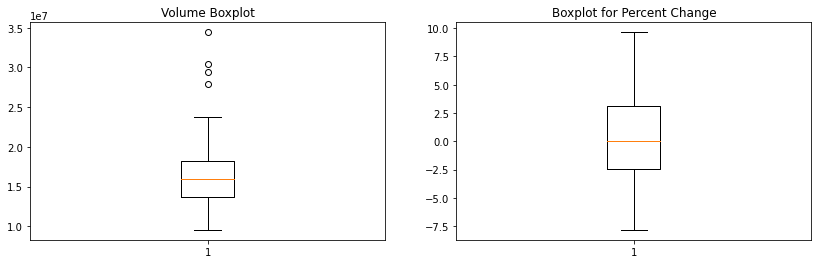

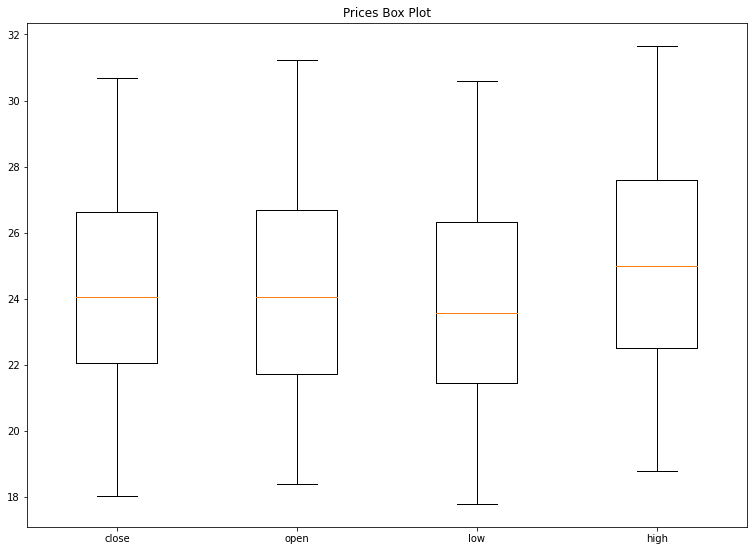

In [47]:
get_outliers(dGM)

### Findings and conclusions - 


## Variable normalization

In [42]:
# Robust Scaler

dcop = df[['close','open','low','high','changePercent','volume']].copy()

# Set up the scaler
scaler = RobustScaler()
scaler.fit(dcop)

# Transform copied df
dcop_scaled = scaler.transform(dcop)
dcop_scaled = pd.DataFrame(dcop_scaled, columns = dcop.columns)

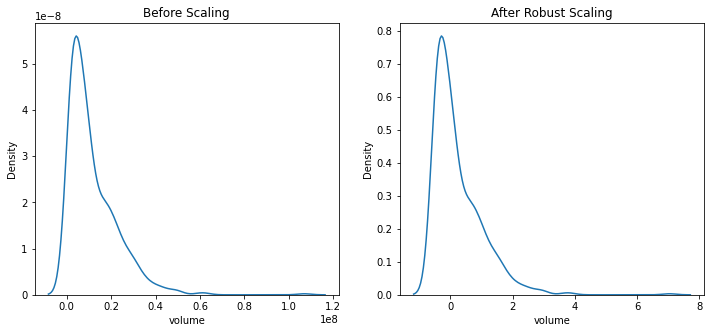

In [44]:
fig_r, (ax1r, ax2r) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1r.set_title('Before Scaling')
sns.kdeplot(dcop['volume'], ax=ax1r)

# After scaling 
ax2r.set_title('After Robust Scaling')
sns.kdeplot(dcop_scaled['volume'], ax=ax2r)
plt.show()

### Findings and conclusions - Which feature was normalised and why? Which technique was used and why?


Volume 
Robust Scaling

## Bonus - Dashboard

### Average closing price per week

### Average change per week

### Average volume per week

### Average closing price per week of each stock

### Average closing price of each sector